In [ ]:
working_df = pd.read_csv('post_wiki_scrape.csv')
working_df = working_df.set_index(['start_year', 'title'])
working_df.head()

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import json
from inspect import currentframe, getframeinfo

### Read in provided data

In [2]:
data_imports = {}

# Importing all the provided CSVs and TSVs to a dictionary
for file in os.listdir("zippedData"):
    print(file)
    if file[-3:] == 'csv':
        data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file))
    elif file[-3:] == 'tsv':
        data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file), sep = '\t', encoding= 'unicode_escape')

print("Finished import")

bom.movie_gross.csv
name.basics.csv
rt.movie_info.tsv
rt.reviews.tsv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv
Finished import


### Starting with Bom.Movie_Gross, I want to set the index as release year and then title

In [3]:
bom_movie_gross = data_imports['bom.movie_gross']
# bom_movie_gross[bom_movie_gross['title'].duplicated(keep=False)]

In [4]:
bom_movie_gross = bom_movie_gross.rename(columns = {'year': 'start_year'})
bom_movie_gross = bom_movie_gross.set_index(['start_year', 'title'])
bom_movie_gross.head()

studio  domestic_gross  \
start_year title                                                                
2010       Toy Story 3                                     BV     415000000.0   
           Alice in Wonderland (2010)                      BV     334200000.0   
           Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
           Inception                                       WB     292600000.0   
           Shrek Forever After                           P/DW     238700000.0   

                                                       foreign_gross  
start_year title                                                      
2010       Toy Story 3                                     652000000  
           Alice in Wonderland (2010)                      691300000  
           Harry Potter and the Deathly Hallows Part 1     664300000  
           Inception                                       535700000  
           Shrek Forever After                             513900000

## In an effort to explore the data, we'll merge title.basics with title.ratings into imdb_df



In [5]:
title_basics = data_imports['title.basics']
title_ratings = data_imports['title.ratings']

title_basics = title_basics.set_index('tconst')
title_ratings = title_ratings.set_index('tconst')
imdb_df = title_basics.join(title_ratings, on='tconst')


## Merge imdb_df with tmdb.movies

In [6]:
tmdb_movies = data_imports['tmdb.movies']
tmdb_movies = tmdb_movies.drop_duplicates(subset = ['id'])
tmdb_movies['start_year'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))
tmdb_movies = tmdb_movies.set_index(['start_year', 'title'])
tmdb_movies.head()

/home/stonehengee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1           0   
           How to Train Your Dragon                               1   
           Iron Man 2                                             2   
1995       Toy Story                                              3   
2010       Inception                                              4   

                                                                   genre_ids  \
start_year title                                                               
2010       Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
           How to Train Your Dragon                      [14, 12, 16, 10751]   
           Iron Man 2                                          [12, 28, 878]   
1995       Toy Story                                         [16, 35, 10751]   
2010       Inception                                           [28, 878, 12]   

                                                            id  \
start_year title                                                 
2010       Harry Potter and the Deathly Hallows: Part 1  12444   
           How to Train Your Dragon                      10191   
           Iron Man 2                                    10138   
1995       Toy Story                                       862   
2010       Inception                                     27205   

                                                        original_language  \
start_year title                                                            
2010       Harry Potter and the Deathly Hallows: Part 1                en   
           How to Train Your Dragon                                    en   
           Iron Man 2                                                  en   
1995       Toy Story                                                   en   
2010       Inception                                                   en   

                                                                                       original_title  \
start_year title                                                                                        
2010       Harry Potter and the Deathly Hallows: Part 1  Harry Potter and the Deathly Hallows: Part 1   
           How to Train Your Dragon                                          How to Train Your Dragon   
           Iron Man 2                                                                      Iron Man 2   
1995       Toy Story                                                                        Toy Story   
2010       Inception                                                                        Inception   

                                                         popularity  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1      33.533   
           How to Train Your Dragon                          28.734   
           Iron Man 2                                        28.515   
1995       Toy Story                                         28.005   
2010       Inception                                         27.920   

                                                        release_date  \
start_year title                                                       
2010       Harry Potter and the Deathly Hallows: Part 1   2010-11-19   
           How to Train Your Dragon                       2010-03-26   
           Iron Man 2                                     2010-05-07   
1995       Toy Story                                      1995-11-22   
2010       Inception                                      2010-07-16   

                                                         vote_average  \
start_year title                                                        
2010       Harry Potter and the Deathly Hallows: Part 1           7.7   
           How to Train Your Dragon  

In [7]:
imdb_df = imdb_df.rename(columns = {'primary_title': "title"})
imdb_df = imdb_df.reset_index()
working_df = imdb_df.set_index(['start_year', 'title']).join(tmdb_movies, how='outer', lsuffix='_imdb', rsuffix='_mvdb')


working_df = working_df.drop(columns=['Unnamed: 0', 'vote_average', 'vote_count', 'popularity', 'genre_ids', 'id'])
# working_df = working_df.fillna(value = {'genres': 'Unknown'})

working_df.head()


,,tconst,original_title_imdb,runtime_minutes,genres,averagerating,numvotes,original_language,original_title_mvdb,release_date
start_year,title,,,,,,,,,
1930,All Quiet on the Western Front,NaN,NaN,NaN,NaN,NaN,NaN,en,All Quiet on the Western Front,1930-04-29
1933,The Vampire Bat,NaN,NaN,NaN,NaN,NaN,NaN,en,The Vampire Bat,1933-01-21
1936,Le Bonheur,NaN,NaN,NaN,NaN,NaN,NaN,fr,Le Bonheur,1936-02-27
1939,How Walt Disney Cartoons Are Made,NaN,NaN,NaN,NaN,NaN,NaN,en,How Walt Disney Cartoons Are Made,1939-01-19
1946,The Best Years of Our Lives,NaN,NaN,NaN,NaN,NaN,NaN,en,The Best Years of Our Lives,1946-12-25


## Add in bom_movie_gross

In [8]:
working_df = working_df.join(bom_movie_gross, how='outer')

# Add in tn_movie_budgets

In [9]:
tn_movie_budgets = data_imports['tn.movie_budgets']

In [11]:
working_df['release_date'] = pd.to_datetime(working_df['release_date'])
tn_movie_budgets['start_year'] = pd.DatetimeIndex(tn_movie_budgets['release_date']).year
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie':'title'})
tn_movie_budgets = tn_movie_budgets.set_index(['start_year', 'title'])

In [12]:
# tn_movie_budgets.head()
working_df = working_df.join(tn_movie_budgets, how='outer', lsuffix='_imdb', rsuffix='_tn')


Drop movies from before 2000

In [13]:
working_df = working_df.reset_index()
working_df = working_df[working_df['start_year'] > 2000]
working_df = working_df.set_index(['start_year', 'title'])

Drop NaN genres

In [14]:
working_df = working_df.dropna(subset=['genres'])
working_df = working_df[working_df['original_language'] == 'en']
working_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11122 entries, (2010, * Cemetery) to (2018, eHero)
Data columns (total 17 columns):
tconst                 11122 non-null object
original_title_imdb    11122 non-null object
runtime_minutes        10864 non-null float64
genres                 11122 non-null object
averagerating          10761 non-null float64
numvotes               10761 non-null float64
original_language      11122 non-null object
original_title_mvdb    11122 non-null object
release_date_imdb      11122 non-null datetime64[ns]
studio                 1430 non-null object
domestic_gross_imdb    1424 non-null float64
foreign_gross          1127 non-null object
id                     1398 non-null float64
release_date_tn        1398 non-null object
production_budget      1398 non-null object
domestic_gross_tn      1398 non-null object
worldwide_gross        1398 non-null object
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 2.6+ MB


# Scraping wikipedia for production budgets

At this point I had to decide whether it was better to remove foreign films from the dataset or spend the time it would require to write code to account for each individual foreign currency found through scrapping. I ultimately decided, both due to the scope of the project (Microsoft being an American company) and the marginal number of foreign films remaining in my dataset that it was better to simply return None for budgets not in US dollars.

In [15]:
# Takes in the string, isolated as a budget, and returns a number of type int


def convert_budget_to_int(budget, debug):

    #     Checks for various non-alphanumeric characters

    if type(budget) == int:
        return budget
    if type(budget) == float:
        return int(budget)
    if budget.startswith('$CAD'):
        return None
    if budget.startswith('$') or budget.startswith('US$'):
        if budget[0] == '<':
            budget = budget[1:]
            
#  Enable for Avatar 2009, breaks other movies


#         if '$' in budget[3:]:
#             temp = budget[3:]
#             budget = budget[:temp.index('$')+3]
        while '[' in budget:
            budget = budget.replace(
                budget[budget.index('['):budget.index(']')+1], '')
        if '–' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('–')+1:]
            budget = currency + budget
        if '-' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('-')+1:]
            budget = currency + budget
        if '—' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('—')+1:]
            budget = currency + budget
        if debug:
            print(budget)

#     Using regex because for some reason ' ' would not be recognized for certain movies
        if bool(re.search(r"\s", budget)):
            whitespace_index = re.search(r"\s", budget).start()
            if budget[whitespace_index-1].isnumeric():
                number = budget[:whitespace_index]
                word = budget[whitespace_index+1:]
            else:
                whitespace_index = re.search(
                    r"\s", budget[:whitespace_index]+budget[whitespace_index+1:]).start()
                number = budget[:whitespace_index+1]
                word = budget[whitespace_index+2:]
            if debug:
                print(word)
                print(number)

        else:
            number, word = budget, ''
        if debug:
            print(number, 'Before \'.\' check')
        if '.' in number:
            left, right = number.split('.')
            decimal_places = len(right)
            number = number.replace('.', '')

#     Replacing instnaces of million and crore (Indian for ten million) with the proper number of zeroes

        if 'crore' in word.lower():
            try:
                number = number + '0000000'[decimal_places:]
            except:
                number = number + '0000000'
        elif 'million' in word.lower():
            try:
                number = number + '000000'[decimal_places:]
            except:
                number = number + '000000'

        if ',' in number:
            number = number.replace(',', '')

        budget = budget.strip()
        if debug:
            print(budget)

        if budget[0] == '$':
            number = number.replace('$', '')
        elif budget[:3] == 'US$':
            number = number.replace('US$', '')

        return int(number)

# Replaces spaces in a URL with %20


def urlify(in_string):
    return "%20".join(in_string.split())


'''Uses Wikipedia's API to search for movies. 
In practice I would search by the title and year to reduce the chance of an incorrect match'''


def wiki_search(search):
    url = "https://en.wikipedia.org/w/api.php?action=query&format=json&prop=&list=search&srsearch={}".format(
        urlify(search))
    response = requests.get(url=url)

    try:
        return(response.json()['query']['search'][0]['pageid'])
    except IndexError:
        return None


'''The called function which managed the search for movies on Wikipedia, 
the isolating of the budget string, and ultimately the return of the budget as an integer'''


def wiki_grab(search, debug=False):
    searches_to_ignore = ['#Stuck 2014',
                          'House of Black Wings 2010',
                          'Restoring a Masterpiece: The Renovation of Eastman Theatre 2010',
                          'Avatar: Special Edition 2010',
                          'The Forgotten Jewel 2010',
                          'Birth of a Party 2011'
                          ]
    if search[0] == '#':
        return None
    if search in searches_to_ignore:
        return None
    pageid = wiki_search(search)
    if debug:
        print(pageid)
    if pageid is None:
        return None
    url = 'https://en.wikipedia.org/w/api.php?action=parse&format=json&pageid={}&prop=text&formatversion=2'.format(
        pageid)
    if debug:
        print(url)
    response = requests.get(url=url)
    soup = BeautifulSoup(response.json()['parse']['text'])

    if 'Budget</th>' in str(soup):
        if soup.find(text='Budget').next.text:
            return convert_budget_to_int(soup.find(text='Budget').next.text, debug)
        elif '(gross)' in soup.find(text='Budget').next.text:
            gross = soup.find('li', text=re.compile(r' .+(\(gross\))')).text
            gross = gross.replace(' (gross)', '')
            gross = convert_budget_to_int(gross, debug)
            return(gross)
        elif re.compile(r' \d') in soup.find(text='Budget').next.li.text:
            return(soup.find('li', text=re.compile(r' \d')))

# A test run
# print(wiki_grab("Habermann 2010", True))


In [ ]:
working_df['budget_wiki'] = np.nan
for year, title in working_df[working_df['budget_wiki'].isna()].index.values.tolist():
    try:
#         Do not search again in the senario that we're running this code multiple times due to error
        if working_df.loc[(year, title), 'budget_wiki'].values[0] == -1:
            continue
        print(title, year)
        budget = wiki_grab(title + ' ' + str(year))
        if budget == None:
            working_df.loc[(year, title), 'budget_wiki'] = -1
        else:
            working_df.loc[(year, title), 'budget_wiki'] = budget
        print(working_df.loc[(year, title), 'budget_wiki'])
    except:
        working_df.loc[(year, title), 'budget_wiki'] = -1

Save my work

In [16]:
# working_df.to_csv('post_wiki_scrape.csv')

working_df = pd.read_csv('post_wiki_scrape.csv')
working_df = working_df.set_index(['start_year', 'title'])
working_df.head()

tconst original_title_imdb  runtime_minutes  \
start_year title                                                              
2010       * Cemetery        tt1598691          * Cemetery             80.0   
           127 Hours         tt1542344           127 Hours             94.0   
           12th & Delaware   tt1548865     12th & Delaware             81.0   
           13                tt0798817                  13             91.0   
           15 Till Midnight  tt1568798    15 Till Midnight             97.0   

                                                genres  averagerating  \
start_year title                                                        
2010       * Cemetery           Comedy,Horror,Thriller            5.2   
           127 Hours         Adventure,Biography,Drama            7.6   
           12th & Delaware           Documentary,Drama            7.5   
           13                           Drama,Thriller            6.1   
           15 Till Midnight       Drama,Mystery,Sci-Fi            2.8   

                             numvotes original_language original_title_mvdb  \
start_year title                                                              
2010       * Cemetery            17.0                en          * Cemetery   
           127 Hours         323949.0                en           127 Hours   
           12th & Delaware      407.0                en     12th & Delaware   
           13                 38418.0                en                  13   
           15 Till Midnight     244.0                en    15 Till Midnight   

                            release_date_imdb studio  domestic_gross_imdb  \
start_year title                                                            
2010       * Cemetery              2010-01-01    NaN                  NaN   
           127 Hours               2010-11-05   FoxS           18300000.0   
           12th & Delaware         2010-04-01    NaN                  NaN   
           13                      2010-03-12    NaN                  NaN   
           15 Till Midnight        2010-01-01    NaN                  NaN   

                            foreign_gross   id release_date_tn  \
start_year title                                                 
2010       * Cemetery                 NaN  NaN             NaN   
           127 Hours             42400000  6.0     Nov 5, 2010   
           12th & Delaware            NaN  NaN             NaN   
           13                         NaN  NaN             NaN   
           15 Till Midnight           NaN  NaN             NaN   

                            production_budget domestic_gross_tn  \
start_year title                                                  
2010       * Cemetery                     NaN               NaN   
           127 Hours              $18,000,000       $18,335,230   
           12th & Delaware                NaN               NaN   
           13                             NaN               NaN   
           15 Till Midnight               NaN               NaN   

                            worldwide_gross budget_wiki  
start_year title                                         
2010       * Cemetery                   NaN     Unknown  
           127 Hours            $60,217,171    18000000  
           12th & Delaware              NaN     Unknown  
           13                           NaN     Unknown  
           15 Till Midnight             NaN     Unknown

In [30]:
# Convert financial columns to int64 for comparison

def convert_columns_to_int(budget):
    try:
        return int(float(budget))
    except:
        return convert_budget_to_int(budget, False)

for column in ['domestic_gross_imdb', 'foreign_gross', 'production_budget', 'domestic_gross_tn', 'worldwide_gross', 'budget_wiki']:
    working_df[column] = working_df[column].fillna(-1)
    working_df[column] = working_df[column].apply(lambda x: convert_columns_to_int(x))
    working_df[column] = working_df[column].astype('int64')

working_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11122 entries, (2010, * Cemetery) to (2018, eHero)
Data columns (total 21 columns):
tconst                 11122 non-null object
original_title_imdb    11122 non-null object
runtime_minutes        10864 non-null float64
genres                 11122 non-null object
averagerating          10761 non-null float64
numvotes               10761 non-null float64
original_language      11122 non-null object
original_title_mvdb    11122 non-null object
release_date_imdb      11122 non-null object
studio                 1430 non-null object
domestic_gross_imdb    11122 non-null int64
foreign_gross          11122 non-null int64
id                     1398 non-null float64
release_date_tn        1398 non-null object
production_budget      11122 non-null int64
domestic_gross_tn      11122 non-null int64
worldwide_gross        11122 non-null int64
budget_wiki            11122 non-null int64
genre1                 11122 non-null object
genre2          

In [31]:
'''
Derive a working worldwide gross and working budget based on the data gathered with a
preference for information from IMDB and Wikipedia based on token examinations of the datasets
'''

working_df['working_wwg'] = working_df.apply(
    lambda x: x['domestic_gross_imdb'] + x['foreign_gross'] if x['domestic_gross_imdb'] > -1 and x['foreign_gross'] > -1 
        else x['worldwide_gross'], axis = 1)
working_df['working_budget'] = working_df.apply(
    lambda x: x['budget_wiki'] if x['budget_wiki'] > -1 else x['production_budget'], axis = 1)

In [32]:
working_df['roi'] = working_df.apply(lambda x: x['working_wwg'] - x['working_budget'], axis = 1)
working_df = working_df.drop_duplicates()

# Split 'genre' column into genre1, genre2, genre3


In [34]:
# Find the maximum amount of commas in the genres column
comma_counter = 0

for each in working_df['genres']:
    if type(each) == str:
        current_count = each.count(',')
        if current_count > comma_counter:
            comma_counter = current_count
    
comma_counter

2

In [35]:
working_df[['genre1', 'genre2', 'genre3']] = working_df['genres'].str.split(',', expand=True)


## replacing NaN with "Unknown"

In [36]:
working_df = working_df.fillna(value = {
    'genres': 'Unknown', 'genre1': 'Unknown', 'genre3': 'Unknown', 'genre2': 'Unknown'
})

analysis_df = working_df[[
    'runtime_minutes',
    'genres',
    'genre1',
    'genre2',
    'genre3',
    'working_wwg',
    'working_budget',
    'roi'
]].copy()
analysis_df.head()

runtime_minutes                     genres  \
start_year title                                                          
2010       * Cemetery                   80.0     Comedy,Horror,Thriller   
           127 Hours                    94.0  Adventure,Biography,Drama   
           12th & Delaware              81.0          Documentary,Drama   
           13                           91.0             Drama,Thriller   
           15 Till Midnight             97.0       Drama,Mystery,Sci-Fi   

                                  genre1     genre2    genre3  working_wwg  \
start_year title                                                             
2010       * Cemetery             Comedy     Horror  Thriller           -1   
           127 Hours           Adventure  Biography     Drama     60700000   
           12th & Delaware   Documentary      Drama   Unknown           -1   
           13                      Drama   Thriller   Unknown           -1   
           15 Till Midnight        Drama    Mystery    Sci-Fi           -1   

                             working_budget       roi  
start_year title                                       
2010       * Cemetery                    -1         0  
           127 Hours               18000000  42700000  
           12th & Delaware               -1         0  
           13                            -1         0  
           15 Till Midnight              -1         0

In [37]:
analysis_df = analysis_df[analysis_df['roi'] != 0]
analysis_df = analysis_df[analysis_df['working_wwg'] != -1]
analysis_df = analysis_df[analysis_df['working_budget'] != -1]
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1512 entries, (2010, 127 Hours) to (2018, Winchester)
Data columns (total 8 columns):
runtime_minutes    1502 non-null float64
genres             1512 non-null object
genre1             1512 non-null object
genre2             1512 non-null object
genre3             1512 non-null object
working_wwg        1512 non-null int64
working_budget     1512 non-null int64
roi                1512 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 180.9+ KB


In [38]:
analysis_df = analysis_df.reset_index()
analysis_df= analysis_df.rename(columns = {'start_year': 'year'})

# Analysis

## We'll break up the dataframe along certain budget markers and create series through which we can analyse the performance of different genres

Note that this method double and tripple counts certain movies with more than one listed genre, which is why it's important for us to eliminate genres with too few examples to prevent skewing.

In [39]:
genre_roi = pd.concat([pd.Series(analysis_df['roi'].values, analysis_df['genre1']),
                       pd.Series(analysis_df['roi'].values, analysis_df['genre2']),
                       pd.Series(analysis_df['roi'].values, analysis_df['genre3'])])

analysis_df_1mil = analysis_df[analysis_df['working_budget'] >= 1000000].copy()

genre_roi1 = pd.concat([pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre1']),
                       pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre2']),
                       pd.Series(analysis_df_1mil['roi'].values, analysis_df_1mil['genre3'])])

analysis_df_10mil = analysis_df[analysis_df['working_budget'] >= 10000000].copy()

genre_roi10 = pd.concat([pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre1']),
                       pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre2']),
                       pd.Series(analysis_df_10mil['roi'].values, analysis_df_10mil['genre3'])])

## Let's check how many of each genre we have so we can prevent skewing

In [40]:
pd.DataFrame(genre_roi).reset_index()['index'].value_counts()

Drama          735
Unknown        686
Comedy         519
Action         443
Adventure      358
Thriller       270
Crime          237
Romance        196
Horror         180
Biography      140
Sci-Fi         128
Mystery        128
Fantasy        125
Animation      104
Family          92
Music           47
Documentary     44
History         40
Sport           29
War             15
Western         11
Musical          8
Reality-TV       1
Name: index, dtype: int64

In [41]:
pd.DataFrame(genre_roi1).reset_index()['index'].value_counts()

Drama          699
Unknown        627
Comedy         503
Action         437
Adventure      358
Thriller       255
Crime          233
Romance        185
Horror         167
Biography      137
Fantasy        122
Sci-Fi         121
Mystery        117
Animation      104
Family          90
Music           46
History         40
Documentary     36
Sport           29
War             15
Western         11
Musical          8
Reality-TV       1
Name: index, dtype: int64

In [42]:
pd.DataFrame(genre_roi10).reset_index()['index'].value_counts()

Drama          529
Comedy         406
Unknown        405
Action         396
Adventure      336
Crime          195
Thriller       186
Romance        141
Fantasy        111
Biography      111
Sci-Fi         106
Animation       99
Horror          95
Mystery         79
Family          77
History         35
Music           34
Sport           24
Documentary     15
War             13
Western          8
Musical          7
Name: index, dtype: int64

In [43]:
genre_roi = genre_roi.drop(labels=['Reality-TV', 'Musical'])
genre_roi1 = genre_roi1.drop(labels=['Reality-TV', 'Musical'])
genre_roi10 = genre_roi10.drop(labels=['Western', 'Musical'])



Before we graph these sets, we're going to reset the index and properly name the roi column

In [44]:
genre_roi_df = pd.DataFrame(genre_roi).reset_index().rename(columns={0:'roi'})
genre_roi1_df = pd.DataFrame(genre_roi1).reset_index().rename(columns={0:'roi'})
genre_roi10_df = pd.DataFrame(genre_roi10).reset_index().rename(columns={0:'roi'})

## General genre return on investment breakdown (no budget floor, excluded genres with fewer than 10 films in dataset)


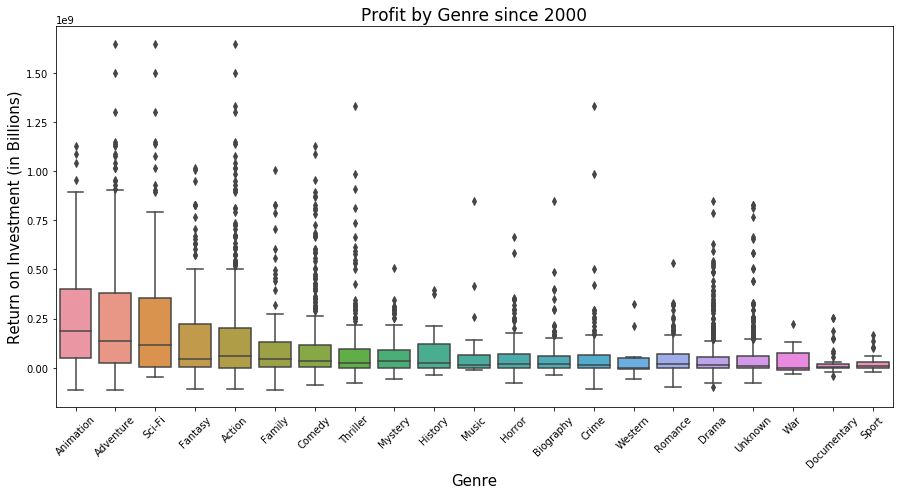

In [45]:
my_order = genre_roi_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi_df['index'], y=genre_roi_df['roi'], data=(genre_roi_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15);

## General genre return on investment breakdown (budget >$1 million,  excluded genres with fewer than 10 films in dataset)


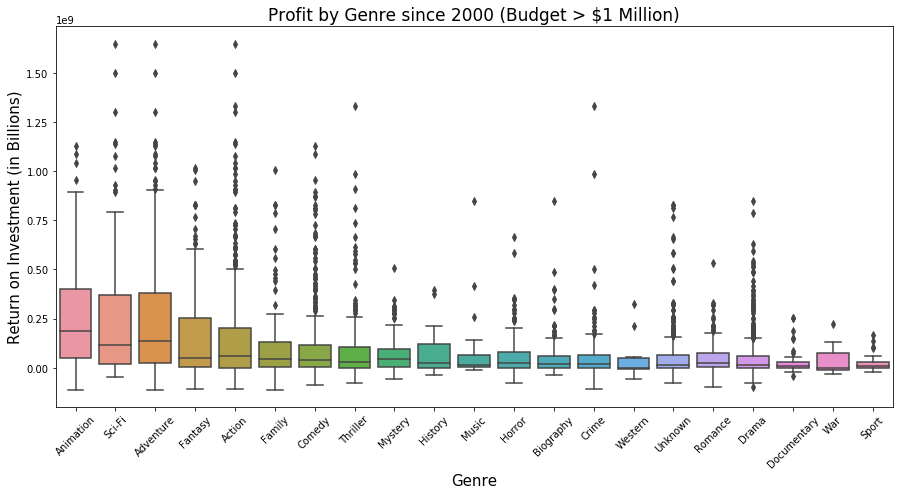

In [46]:
my_order = genre_roi1_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi1_df['index'], y=genre_roi1_df['roi'], data=(genre_roi1_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000 (Budget > $1 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15);

## General genre return on investment breakdown (budget >$10 million,  excluded genres with fewer than 10 films in dataset)


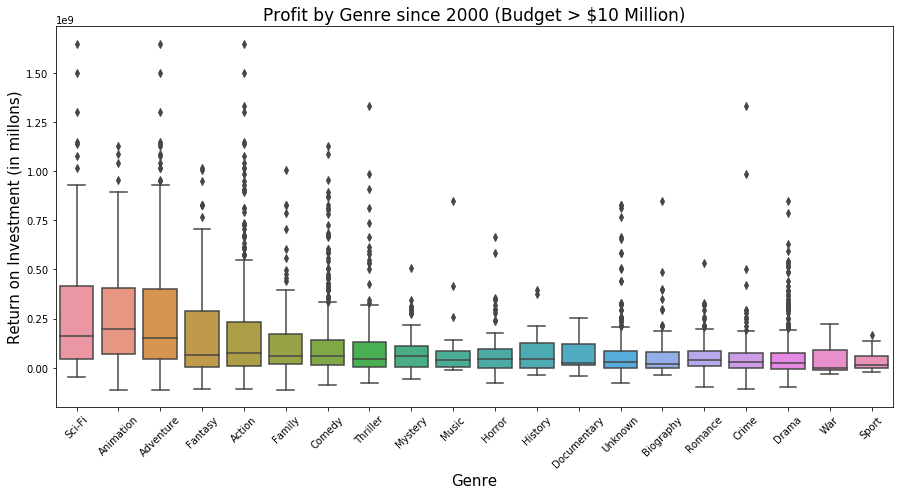

In [47]:
my_order = genre_roi10_df.groupby("index")["roi"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))

ax = sns.boxplot(x=genre_roi10_df['index'], y=genre_roi10_df['roi'], data=(genre_roi10_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000 (Budget > $10 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in millons)', fontsize=15);

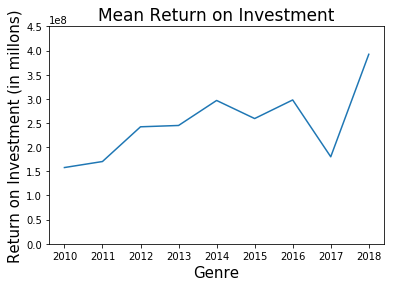

In [48]:
genre_roi2_scifi = pd.DataFrame(pd.concat([pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre1'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre1'] == 'Sci-Fi']['roi']),
                               pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre2'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre2'] == 'Sci-Fi']['roi']),
                               pd.Series(analysis_df_1mil.loc[analysis_df_1mil['genre3'] == 'Sci-Fi']['year'].values, analysis_df_1mil.loc[analysis_df_1mil['genre3'] == 'Sci-Fi']['roi'])]
                              )).reset_index().rename(columns={0:'year'})

grouped_mean = genre_roi2_scifi.groupby('year').mean()

ax = sns.lineplot(x= grouped_mean.index, y=grouped_mean.roi, data=grouped_mean)
plt.ylim(0, 450000000)
ax.set_title('Mean Return on Investment', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in millons)', fontsize=15);

In [49]:
working_df[working_df['genres'].str.contains('Sci-Fi')]

tconst  \
start_year title                                          
2010       15 Till Midnight                   tt1568798   
           Alien Vengeance II: Rogue Element  tt1637674   
           Altitude                           tt1407049   
           Ashes                              tt1674769   
           Dark Metropolis                    tt1825735   
           Defcon 2012                        tt1349646   
           Denizen                            tt1194424   
           Disconnect                         tt0419692   
           Eyes in the Dark                   tt1561479   
           Ghost from the Machine             tt1303782   
           Glenn, the Flying Robot            tt0934446   
           Godkiller: Walk Among Us           tt1384961   
           Grey Skies                         tt1568332   
           Growth                             tt1300159   
           Hot Tub Time Machine               tt1231587   
           Hunter Prey                        tt1270291   
           Inception                          tt1375666   
           Iron Man 2                         tt1228705   
           Mars                               tt1109488   
           Monsters                           tt1470827   
           Mysterious Island                  tt1705125   
           Never Let Me Go                    tt1334260   
           Nightbeasts                        tt1513835   
           Pickman's Muse                     tt1488032   
           Predators                          tt1424381   
           Radio Free Albemuth                tt1129396   
           Re-Generator                       tt2923076   
           Repo Men                           tt1053424   
           Skyline                            tt1564585   
           Slime City Massacre                tt1401631   
...                                                 ...   
2018       Pocketman and Cargoboy             tt7625712   
           Project E.1337: ALPHA              tt5809726   
           Prospect                           tt7946422   
           Rampage                            tt2231461   
           Ready Player One                   tt1677720   
           Red Island                         tt4965146   
           Scorched Earth                     tt2392748   
           Shangri-La: Near Extinction        tt7007846   
           Snake Outta Compton                tt6987760   
           Soft Matter                        tt5891150   
           Sorry to Bother You                tt5688932   
           Starfish                           tt5700182   
           Tau                                tt4357394   
           The Dark                           tt8032572   
           The Dawnseeker                     tt8548792   
           The Domestics                      tt5591666   
           The First Purge                    tt6133466   
           The Lucky Man                      tt3458760   
           The Meg                            tt4779682   
           The Predator                       tt3829266   
           Three Worlds                       tt4347994   
           Time Jumpers                       tt8041916   
           Tinker'                            tt3833682   
           Twisted Pair                       tt8196068   
           UFO                                tt6290798   
           Upgrade                            tt6499752   
           Venom                              tt1270797   
           Violentia                          tt3446330   
           Wastelander                        tt2651724   
           Zoe                                tt6010628   

                                                            original_title_imdb  \
start_year title                                                                  
2010       15 Till Midnight                                    15 Till Midnight   
           Alien Vengeance II: Rogue Element  Alien Vengeance II: Rogue Element   

## group by runtime_minutes


In [50]:
analysis_df_runtime_grouped = analysis_df_1mil.copy()

In [51]:
analysis_df_runtime_grouped['runtime_desc'] = analysis_df_runtime_grouped.apply(
    lambda x: 'short' if x['runtime_minutes'] <= 95.0 else(
        'medium' if x['runtime_minutes'] <= 118.0 else 'long'), axis = 1
)

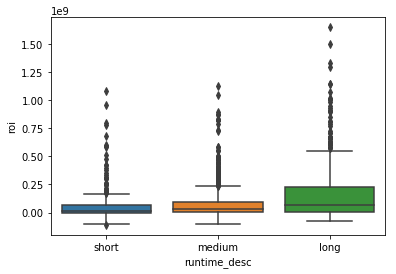

In [52]:
ax = sns.boxplot(x=analysis_df_runtime_grouped['runtime_desc'], y=analysis_df_runtime_grouped['roi'], data=analysis_df_runtime_grouped)


## Looking for trends in Adventure/Sci-Fi

In [53]:
analysis_df_1mil.loc[((analysis_df_1mil['genre3'] == 'Sci-Fi') |
                  (analysis_df_1mil['genre2'] == 'Sci-Fi') |
                  (analysis_df_1mil['genre1'] == 'Sci-Fi') )&(
                    (analysis_df_1mil['genre3'] == 'Adventure') |
                    (analysis_df_1mil['genre2'] == 'Adventure') |
                    (analysis_df_1mil['genre1'] == 'Adventure'))
                 ].sort_values(by = 'roi', ascending=False).reset_index().style.apply(
                lambda x: ['background: #00a4ef' if x.title == 'Inception' or x.title == 'Interstellar' else '' for i in x], axis = 1)

,index,year,title,runtime_minutes,genres,genre1,genre2,genre3,working_wwg,working_budget,roi
0,1392,2018,Avengers: Infinity War,149,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,2048134200,400000000,1648134200
1,949,2015,Jurassic World,124,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1648854864,150000000,1498854864
2,474,2012,The Avengers,143,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1517935897,220000000,1297935897
3,1397,2018,Black Panther,134,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1347000000,200000000,1147000000
4,1439,2018,Jurassic World: Fallen Kingdom,128,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1309500000,170000000,1139500000
5,890,2015,Avengers: Age of Ultron,141,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1405400000,330600000,1074800000
6,581,2013,Iron Man 3,130,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1214800000,200000000,1014800000
7,344,2011,Transformers: Dark of the Moon,154,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1123800000,195000000,928800000
8,1086,2016,Captain America: Civil War,147,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1153300000,250000000,903300000
9,865,2014,Transformers: Age of Extinction,165,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,1104000000,210000000,894000000


Christopher Nolan movies are the only non-lisenced films on the list until number 49 - Paul